<a href="https://colab.research.google.com/github/NikzadaShafi/DataViz/blob/main/Data_Visualization_and_storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization and Storytelling - Assignment 6
##### <font color=darkblue> Mohammad Shafi Nikzada - 3754101 </font>
##### <font color=darkblue> Nils Jesper Cornelius - 3754102 </font>

### Link to GitHub
https://github.com/NikzadaShafi/DataViz/blob/main/Data_Visualization_and_storytelling.ipynb

In [ ]:
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt

In [ ]:
# Adult Census Income - Downloading the data
od.download("https://www.kaggle.com/datasets/uciml/adult-census-income")

In [4]:
# Read the data using pandas library
data = pd.read_csv('adult-census-income/adult.csv')

In [5]:
# Replace "?" with NaN
data.replace("?", np.nan, inplace=True)
# Identify missing data
missing_data = data.isna()
# Remove missing data
data = data.dropna()

# <font color=darkblue> 1. Data Exploration and visualization </font>

In [6]:
# Exploring the dataset
data.head(5)   # Let's display the first 5 rows of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


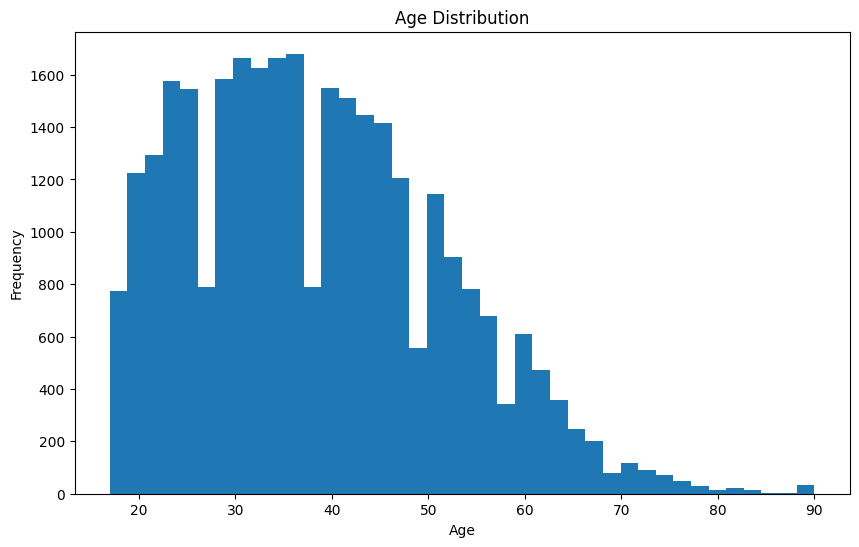

In [7]:
plt.figure(figsize=(10, 6))  # Set the size of the figure to 10 x 6 inches
plt.hist(data['age'], bins=40)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

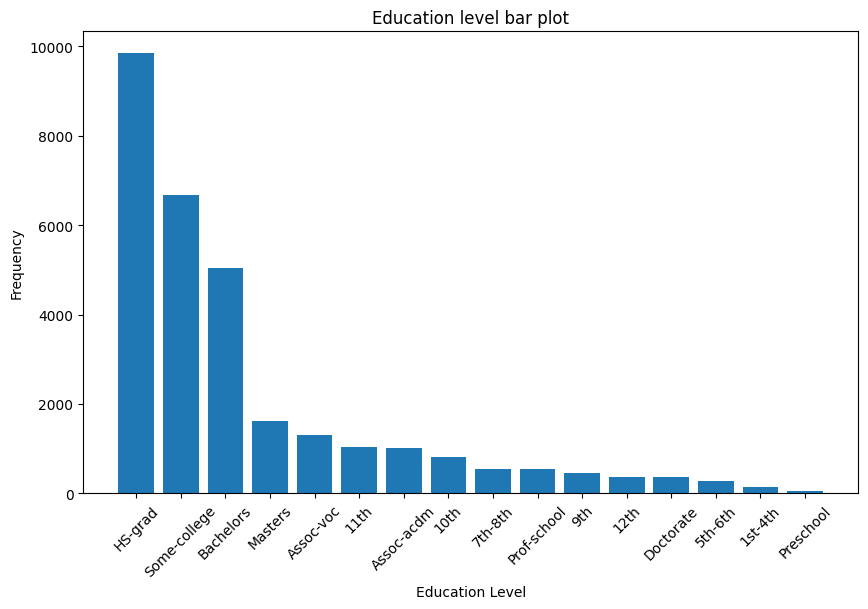

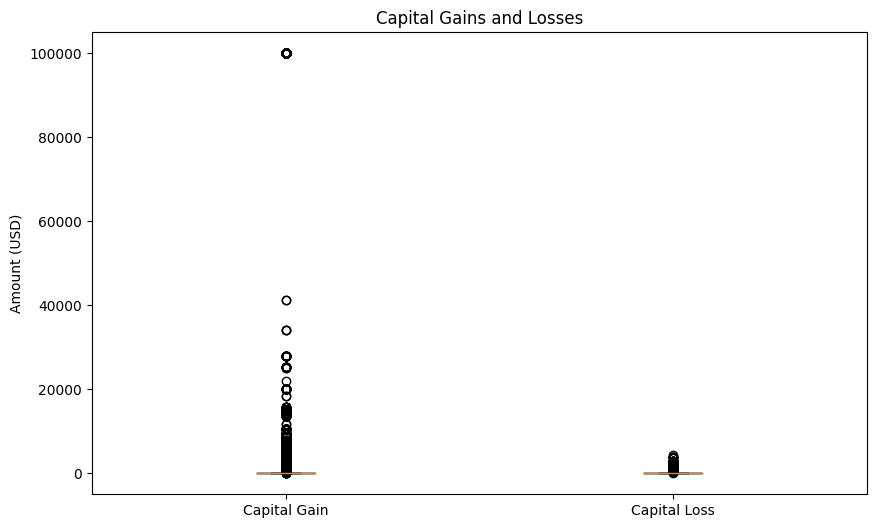

In [8]:
# Bar chart of education level
plt.figure(figsize=(10, 6))  # Set the size of the figure to 10 x 6 inches
education_counts = data['education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.title('Education level bar plot')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Box plot of capital gains and losses
plt.figure(figsize=(10, 6))  # Set the size of the figure to 10 x 6 inches
capital_data = data[['capital.gain', 'capital.loss']]
plt.boxplot(capital_data.values, labels=['Capital Gain', 'Capital Loss'])
plt.title('Capital Gains and Losses')
plt.ylabel('Amount (USD)')
plt.show()

# <font color=darkblue> 2. Interesting questions, Is education level related to income? Is there    a salary gap between genders? <font/>

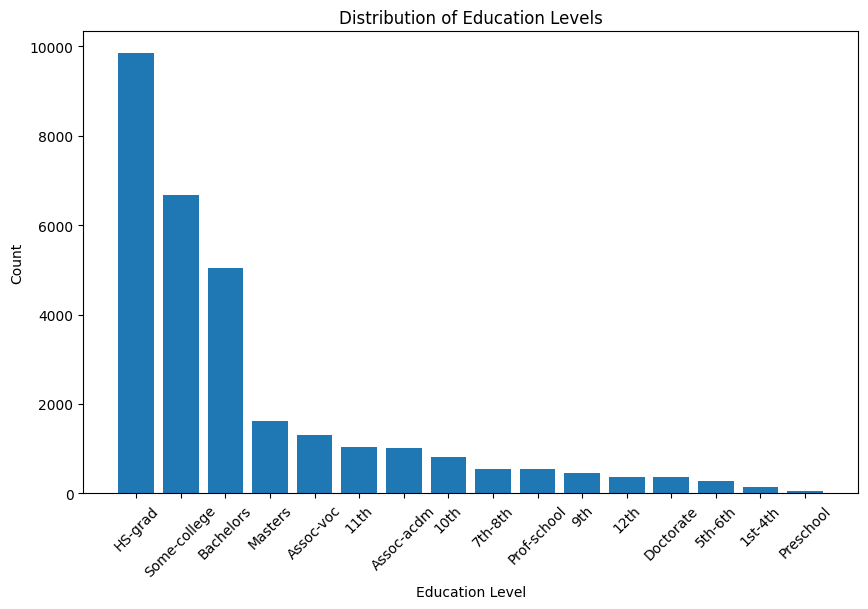

In [9]:
# Let's first Ccreate a bar chart of education levels
plt.figure(figsize=(10, 6))
education_counts = data['education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

From the chart, we can see that the most common education level in the dataset is "HS-grad" (high school graduate), followed by "Some-college" (some college but no degree) and "Bachelors" (bachelor's degree).

### <font color=darkblue>To understand this relation better we can have a look at the box plots <font/>

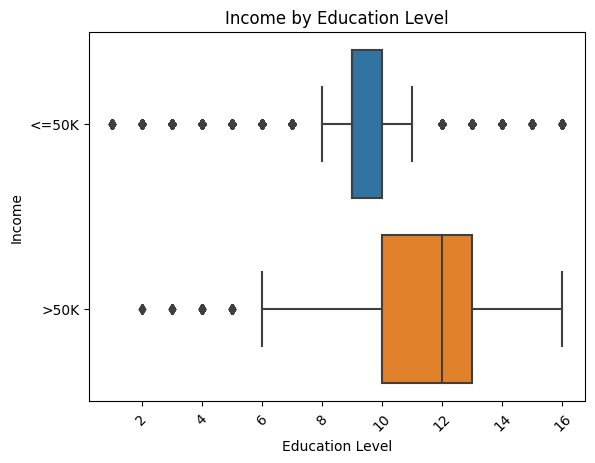

In [10]:
import seaborn as sns

# Create a box plot of income by education level
ax = sns.boxplot(x='education.num', y='income', data=data)
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Income by Education Level')
plt.show()

From the chart, we can see that individuals with higher levels of education tend to have higher incomes.

# <font color=darkblue>Salary gap between genders? <font/>

In [17]:
# Define a mapping
sex_map = {'<=50K': 0, '>50K': 1}

# Create a new column with the numerical data
data['income_numeric'] = data['income'].map(sex_map)

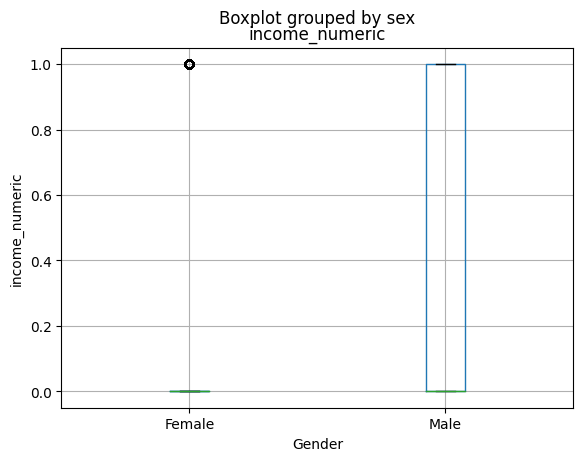

In [18]:
# Create a box plot of income by gender
ax = data.boxplot(column='income_numeric', by='sex')
# ax.set_title('Distribution of income by gender')
plt.xlabel('Gender')
plt.ylabel('income_numeric')
plt.show()

We can see that the median income for men is higher than the median income for women, and the distribution of incomes for women is generally lower than the distribution for men.

## <font color=darkblue> Let's have a look at the problem of salary gap using some other ways <font/>

In [19]:
# Find the unique categories in the income column
sex_categories = data['sex'].unique()

# Define a mapping
gender_map = {'Female': 0, 'Male': 1}

# Create a new column with the numerical data
data['sex_numeric'] = data['sex'].map(gender_map)
genders = data['sex_numeric'].values.tolist()
income = data['income_numeric'].values.tolist()


In [20]:
# Female count
count = 0
for i in range(0,len(genders)):
  if genders[i] == 0 and genders[i] == income[i]:
    count = count + 1

print('Count of female with income <=50K:', count)

# Number of females in the dataset
count_of_zeros = genders.count(0)
print("Total number of female in the dataset:",count_of_zeros) 
print("Percentage of female with income <=50K:",(count/count_of_zeros)*100)

Count of female with income <=50K: 8670
Total number of female in the dataset: 9782
Percentage of female with income <=50K: 88.6321815579636


In [21]:
# Same count for Male
count = 0
for i in range(0,len(genders)):
  if genders[i] == 1 and genders[i] != income[i]:
    count = count + 1

print('Count of male with income <=50K: ', count)

# Number of Males in the dataset
count_of_ones = genders.count(1)
print("Total number of male in the dataset: ", count_of_ones)
print("Percentage of male with income <=50K:",(count/count_of_ones)*100)

Count of male with income <=50K:  13984
Total number of male in the dataset:  20380
Percentage of male with income <=50K: 68.6162904808636


## <font color=darkblue>We can also have a look at correlations of each feature using the following lines of code <font/>

In [22]:
# Select the numerical features
numerical_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income_numeric','sex_numeric']

# Calculate the correlation matrix
corr_matrix = data[numerical_features].corr()

# Print the correlation matrix
print('correlation matrix:')
print(corr_matrix)

correlation matrix:
                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education.num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital.gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital.loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours.per.week  0.101599 -0.022886       0.152522      0.080432      0.052417   
income_numeric  0.241998 -0.008957       0.335286      0.221196      0.150053   
sex_numeric     0.081993  0.025362       0.006157      0.048814      0.047011   

                hours.per.week  income_numeric  sex_numeric  
age                   0.101599        0.241998     0.081993  
fnlwgt               -0.022886       -0.008957     0.025362  
education.num         0.152522        0.335286     0.006157  
ca

In [23]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_numeric,sex_numeric
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,1
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K,1,0
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K,0,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K,1,0
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K,1,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K,1,0
